In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# really numuCC, not nueCC

#nueCC_FC_res_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_muCCFCEnergyResolution.csv", delimiter=",", skip_header=7, dtype=float)

nueCC_FC_res_raw = np.genfromtxt("data/MigMat_numuCC_FC.dat", dtype=float)


nueCC_FC_bkg_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_muCCFC.csv", delimiter=",", skip_header=7+26+2, skip_footer=26+2-1, dtype=float)
nueCC_FC_sig_plus_bkg_raw = np.genfromtxt("data/HEPData-ins1953539-v1-csv/nu_muCCFC.csv", delimiter=",", skip_header=7+26+2+2+26, skip_footer=0, dtype=float)


In [9]:
for x in np.transpose(nueCC_FC_res_raw):
    print(sum(x))

0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
0.9999999999999998
0.9999999999999997
1.0000000000000002
0.9999999999999994
0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999996
1.0000000000000002
1.0
0.9999999999999996
0.9999999999999999
0.9999999999999996
0.9999999999999998
1.0000000000000002
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999998
1.0000000000000002
0.9999999999999997
1.0
1.0000000000000004
0.9999999999999997
1.0
1.0
1.0000000000000002
0.9999999999999998
1.0
1.0
0.9999999999999998
0.9999999999999996
1.0000000000000002
0.9999999999999997
1.0
0.9999999999999996
1.0
1.0
0.9999999999999997
0.9999999999999996
0.9999999999999996
0.9999999999999996
1.0
1.0


In [3]:
nueCC_FC_res = []
for j in range(60):
    for i in range(60):
        nueCC_FC_res.append(nueCC_FC_res_raw[i][j])
        
bin_centers_x = []
bin_centers_y = []
for i in range(60):
    for j in range(60):
        bin_centers_x.append((i + 0.5) / 60. * 3000.)
        bin_centers_y.append((j + 0.5) / 60. * 3000.)
        
b = (60, 60)
r = ((0, 3000), (0, 3000))

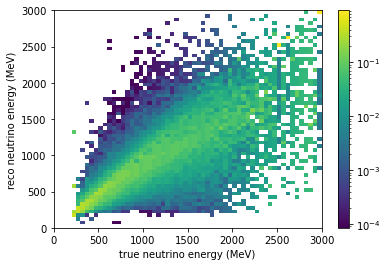

In [4]:
plt.figure()
plt.hist2d(bin_centers_x, bin_centers_y, bins=b, range=r, weights=nueCC_FC_res, norm=mpl.colors.LogNorm())#, vmin=1, vmax=1000)
plt.colorbar()
plt.xlabel("true neutrino energy (MeV)")
plt.ylabel("reco neutrino energy (MeV)")
plt.show()

# matches technote, small changes in vmin and vmax

In [5]:
nueCC_FC_sig = []
for i in range(26):
    nueCC_FC_sig.append(nueCC_FC_sig_plus_bkg_raw[i][3] - nueCC_FC_bkg_raw[i][3])

b = 26
r = (0, 2600)

bin_centers = [_ * 100 + 50 for _ in range(26)]
bin_edges = [_ * 100 for _ in range(27)]

In [6]:
nueCC_FC_sig_from_matrix = [0. for _ in range(26)]
for i in range(60):
    for j in range(60):
        for n in range(26):
            if bin_edges[n] < bin_centers_x[i * 60 + j] < bin_edges[n + 1]:
                nueCC_FC_sig_from_matrix[n] += nueCC_FC_res[i * 60 + j]


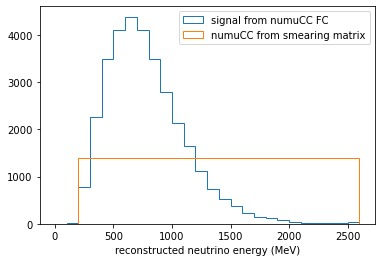

In [7]:
plt.figure()
plt.hist(bin_centers, weights=nueCC_FC_sig, bins=b, range=r, histtype="step", label="signal from numuCC FC")
plt.hist(bin_centers, weights=np.array(nueCC_FC_sig_from_matrix) * 700., bins=b, range=r, histtype="step", label="numuCC from smearing matrix")
plt.legend()
plt.xlabel("reconstructed neutrino energy (MeV)")
plt.show()